AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [11]:
import pandas as pd

# 导入数据集
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 打印前 10 行
first_10_rows = df.head(10).to_string(index=False)

# 打印最后 20 行
last_20_rows = df.tail(20).to_string(index=False)

# 获取数据集的信息
info_buffer = pd.io.common.StringIO()
df.info(buf=info_buffer)
info = info_buffer.getvalue()

# 描述数据集
description = df.describe().to_string()

# 创建一个完整的输出
output = f"""
First 10 Rows:
{first_10_rows}

Last 20 Rows:
{last_20_rows}

DataFrame Info:
{info}

DataFrame Description:
{description}
"""

# 打印合并后的信息
print(output)



First 10 Rows:
 PassengerId  Survived  Pclass                                                Name    Sex  Age  SibSp  Parch           Ticket    Fare Cabin Embarked
           1         0       3                             Braund, Mr. Owen Harris   male 22.0      1      0        A/5 21171  7.2500   NaN        S
           2         1       1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0      1      0         PC 17599 71.2833   C85        C
           3         1       3                              Heikkinen, Miss. Laina female 26.0      0      0 STON/O2. 3101282  7.9250   NaN        S
           4         1       1        Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0      1      0           113803 53.1000  C123        S
           5         0       3                            Allen, Mr. William Henry   male 35.0      0      0           373450  8.0500   NaN        S
           6         0       3                                    Moran, Mr. James   male 

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


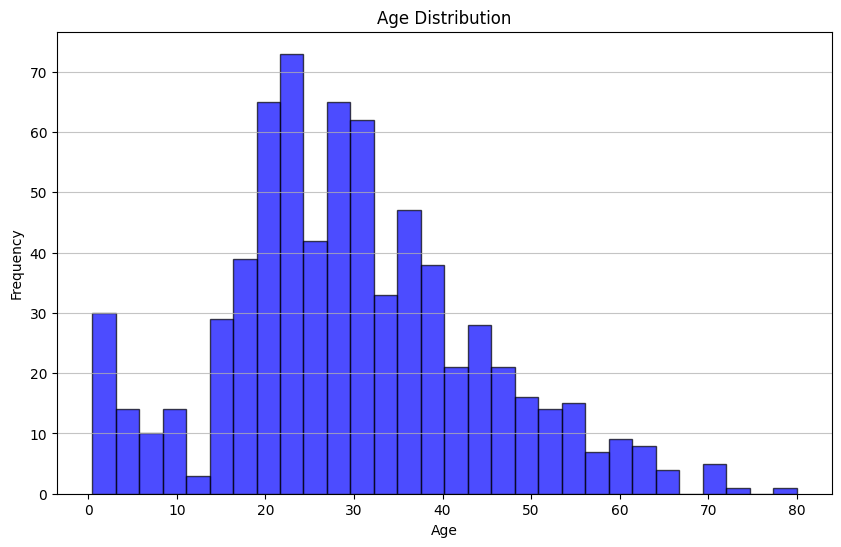

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据集
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. 查找缺失值数量
missing_values = df.isnull().sum()

# 2. 处理 'Age' 列的缺失值
# 2.1. 绘制 'Age' 列的分布图
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2.2. 选择中央趋势的最佳计算方式（中位数）
age_median = df['Age'].median()

# 2.3. 用中位数填充缺失值
df['Age'].fillna(age_median, inplace=True)

# 3. 处理 'Cabin' 列的缺失值（建议删除或用 'U' 表示未知）
df['Cabin'].fillna('U', inplace=True)

# 4. 处理 'Embarked' 列的缺失值（用众数填充）
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

# 5. 处理 'Survived' 列的错误数据（确保为0或1）
df = df[df['Survived'].isin([0, 1])]

# 6. 处理 'Fare' 列的格式问题（确保为数值型）
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# 输出缺失值情况
print(missing_values)


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

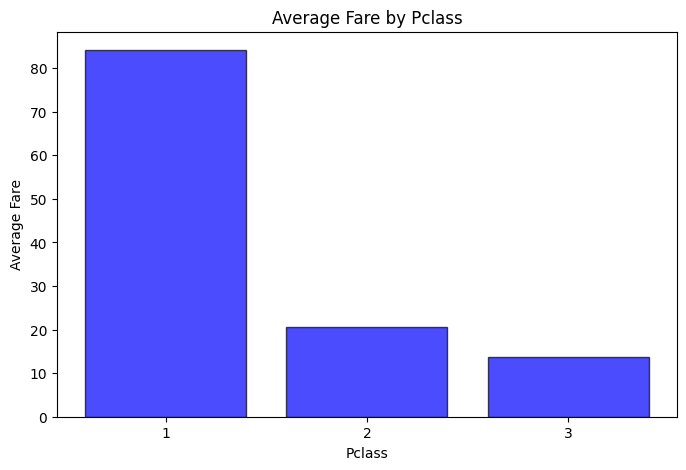

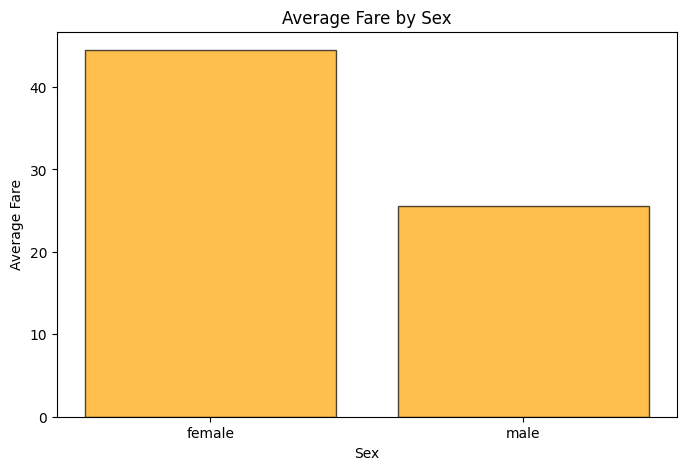

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据集
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. 按照 Pclass 分组计算平均票价
avg_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()

# 1.1. 绘制 Pclass 平均票价的条形图
plt.figure(figsize=(8, 5))
plt.bar(avg_fare_by_pclass['Pclass'], avg_fare_by_pclass['Fare'], color='blue', alpha=0.7, edgecolor='black')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(avg_fare_by_pclass['Pclass'])  # 设置 x 轴刻度
plt.show()

# 2. 按照 Sex 分组计算平均票价
avg_fare_by_sex = df.groupby('Sex')['Fare'].mean().reset_index()

# 2.1. 绘制 Sex 平均票价的条形图
plt.figure(figsize=(8, 5))
plt.bar(avg_fare_by_sex['Sex'], avg_fare_by_sex['Fare'], color='orange', alpha=0.7, edgecolor='black')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(avg_fare_by_sex['Sex'])  # 设置 x 轴刻度
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

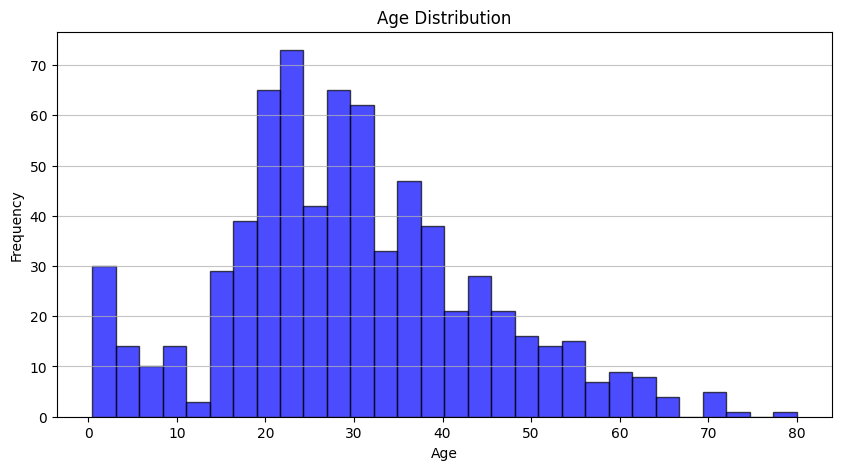

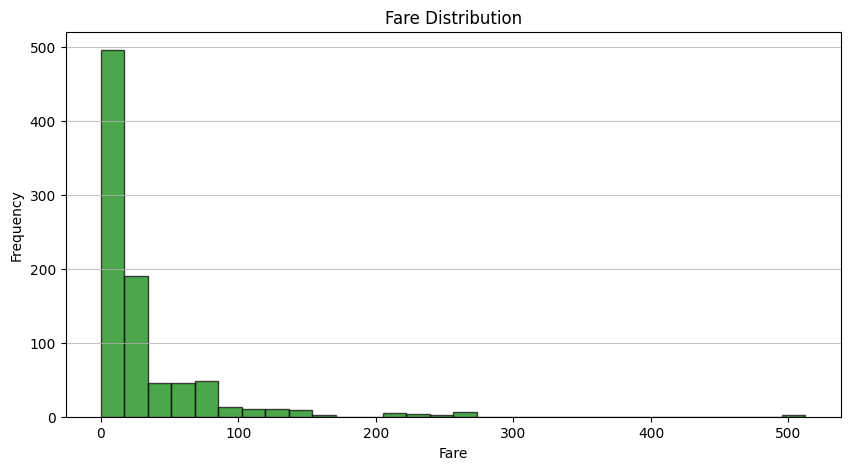

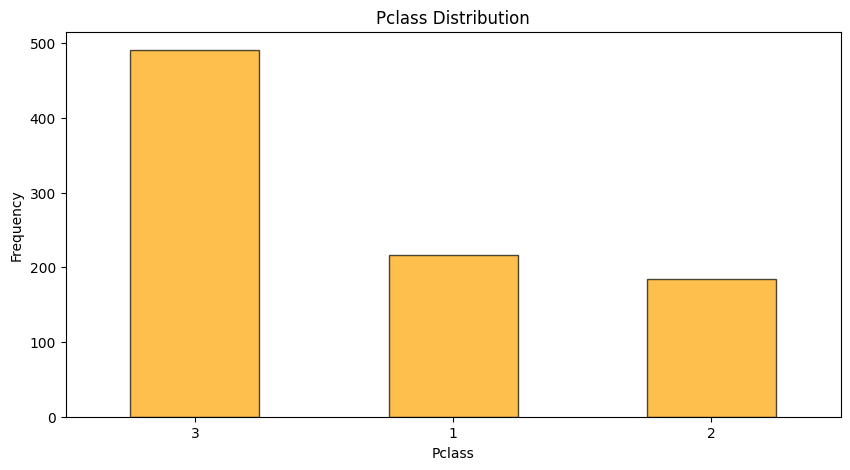

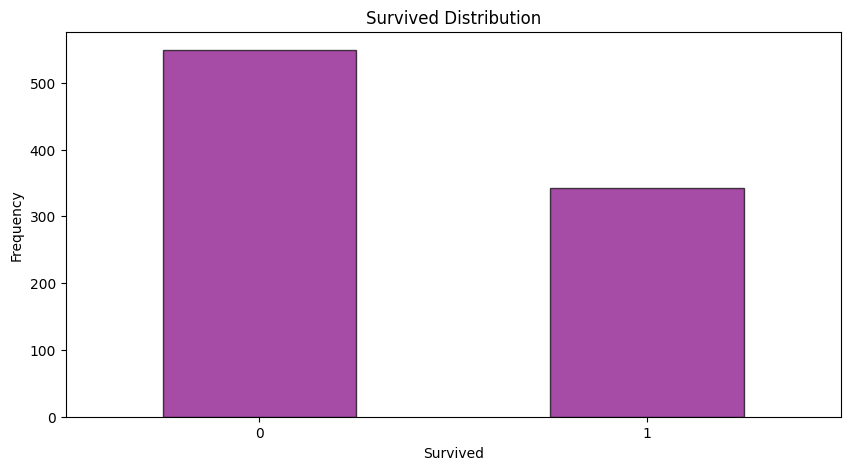

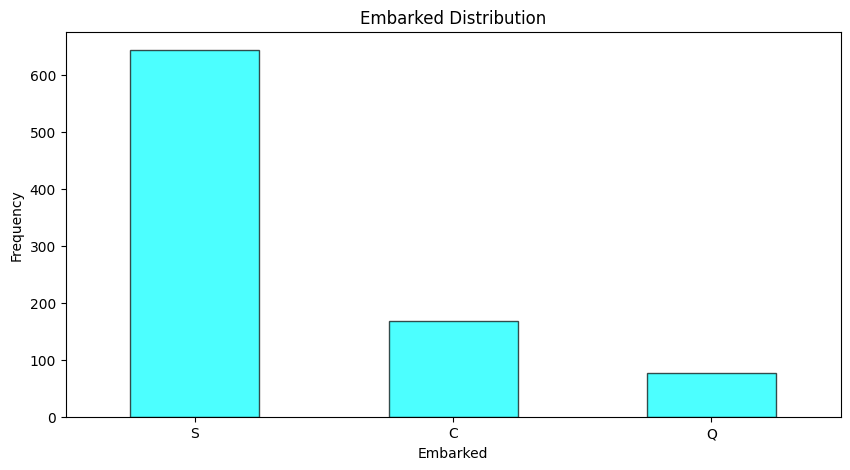

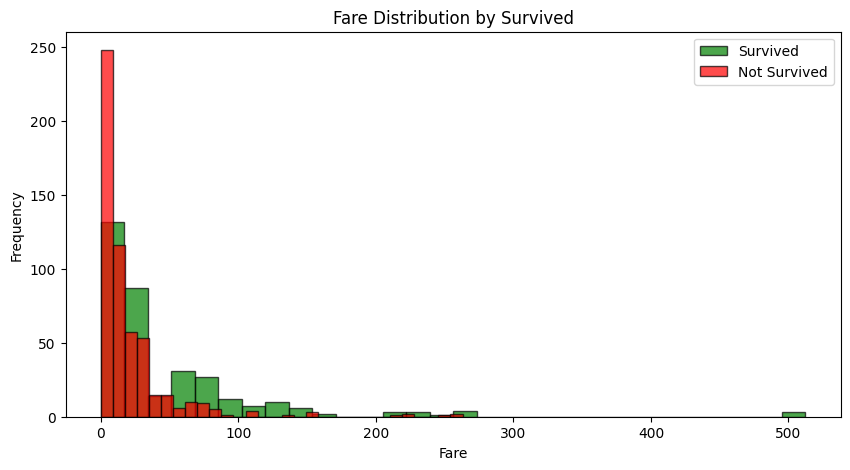

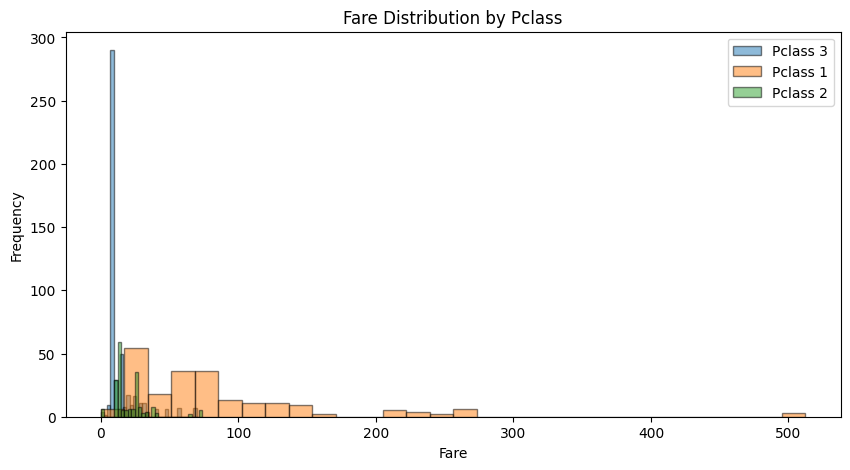

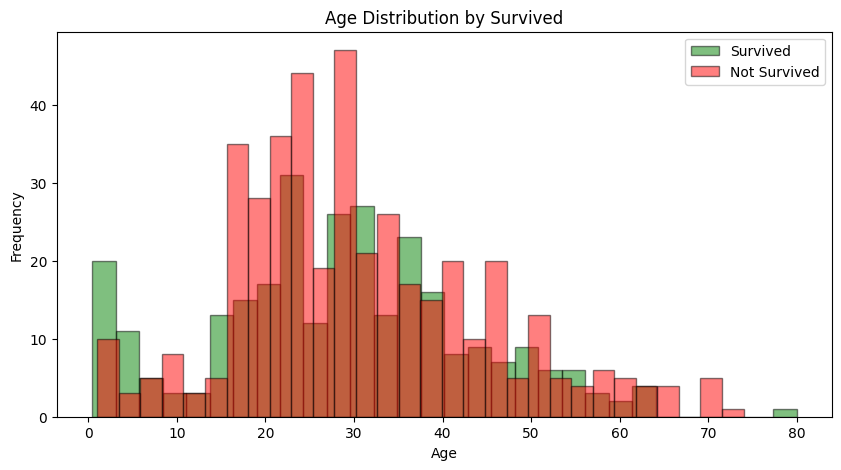

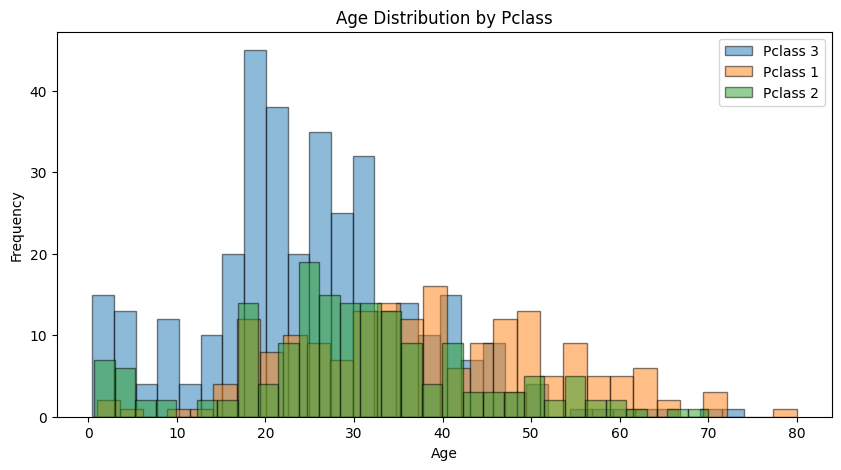

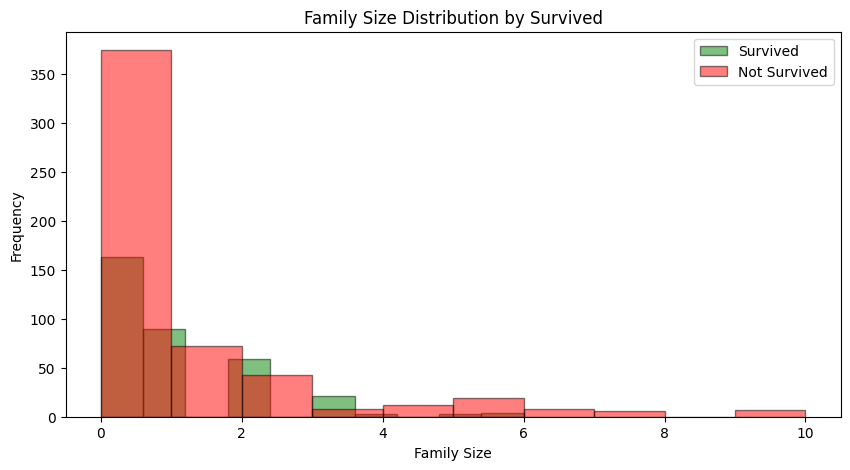

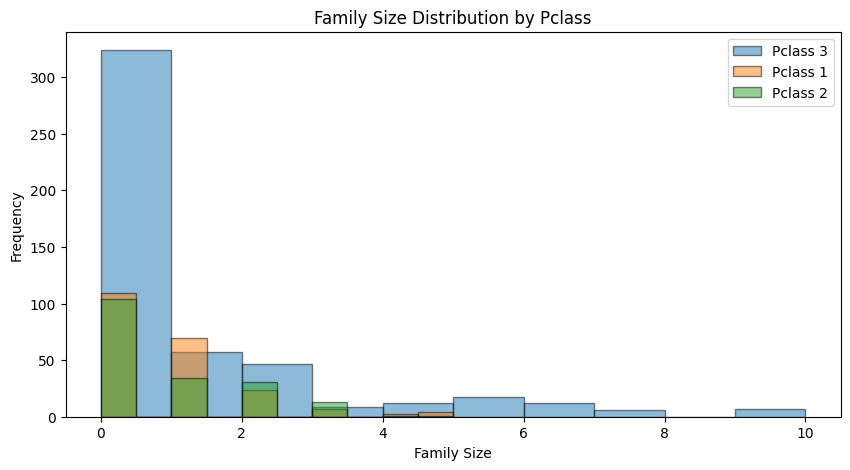

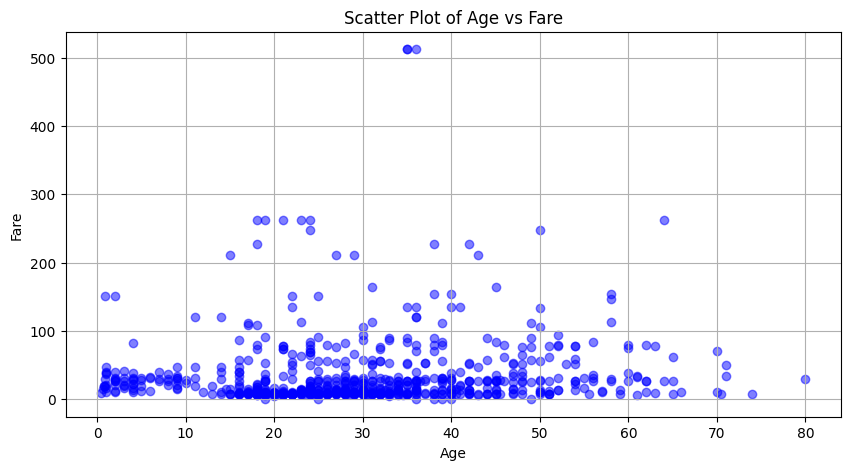

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据集
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. 绘制 'Age' 的分布图
plt.figure(figsize=(10, 5))
plt.hist(df['Age'].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. 绘制 'Fare' 的分布图
plt.figure(figsize=(10, 5))
plt.hist(df['Fare'].dropna(), bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 3. 绘制 'Pclass' 的分布图
plt.figure(figsize=(10, 5))
df['Pclass'].value_counts().plot(kind='bar', color='orange', alpha=0.7, edgecolor='black')
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 4. 绘制 'Survived' 的分布图
plt.figure(figsize=(10, 5))
df['Survived'].value_counts().plot(kind='bar', color='purple', alpha=0.7, edgecolor='black')
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 5. 绘制 'Embarked' 的分布图
plt.figure(figsize=(10, 5))
df['Embarked'].value_counts().plot(kind='bar', color='cyan', alpha=0.7, edgecolor='black')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 6. 绘制 'Fare' 按 'Survived' 分组的分布图
plt.figure(figsize=(10, 5))
df[df['Survived'] == 1]['Fare'].plot(kind='hist', bins=30, alpha=0.7, color='green', edgecolor='black', label='Survived')
df[df['Survived'] == 0]['Fare'].plot(kind='hist', bins=30, alpha=0.7, color='red', edgecolor='black', label='Not Survived')
plt.title('Fare Distribution by Survived')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 7. 绘制 'Fare' 按 'Pclass' 分组的分布图
plt.figure(figsize=(10, 5))
for pclass in df['Pclass'].unique():
    df[df['Pclass'] == pclass]['Fare'].plot(kind='hist', bins=30, alpha=0.5, edgecolor='black', label=f'Pclass {pclass}')
plt.title('Fare Distribution by Pclass')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 8. 绘制 'Age' 按 'Survived' 分组的分布图
plt.figure(figsize=(10, 5))
df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=30, alpha=0.5, color='green', edgecolor='black', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=30, alpha=0.5, color='red', edgecolor='black', label='Not Survived')
plt.title('Age Distribution by Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 9. 绘制 'Age' 按 'Pclass' 分组的分布图
plt.figure(figsize=(10, 5))
for pclass in df['Pclass'].unique():
    df[df['Pclass'] == pclass]['Age'].plot(kind='hist', bins=30, alpha=0.5, edgecolor='black', label=f'Pclass {pclass}')
plt.title('Age Distribution by Pclass')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 10. 合并 'SibSp' 和 'Parch' 并按 'Survived' 分组绘制分布图
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 5))
df[df['Survived'] == 1]['FamilySize'].plot(kind='hist', bins=10, alpha=0.5, color='green', edgecolor='black', label='Survived')
df[df['Survived'] == 0]['FamilySize'].plot(kind='hist', bins=10, alpha=0.5, color='red', edgecolor='black', label='Not Survived')
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 11. 合并 'SibSp' 和 'Parch' 并按 'Pclass' 分组绘制分布图
plt.figure(figsize=(10, 5))
for pclass in df['Pclass'].unique():
    df[df['Pclass'] == pclass]['FamilySize'].plot(kind='hist', bins=10, alpha=0.5, edgecolor='black', label=f'Pclass {pclass}')
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 12. 绘制 'Age' 和 'Fare' 之间的关系图
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['Fare'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

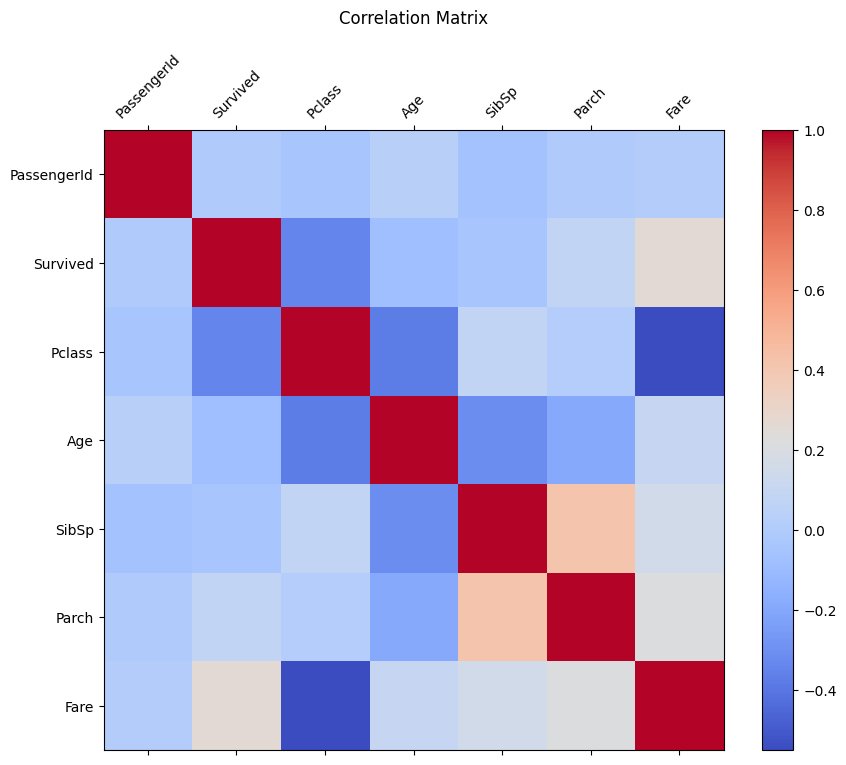

Correlation between Age and Fare: 0.0960666917690389

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

Correlation with Survived:
PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age      

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据集
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. 生成整个数据集的相关性矩阵
correlation_matrix = df.corr()

# 绘制相关性矩阵的热图
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# 2. 查找 'Age' 和 'Fare' 之间的相关性
age_fare_correlation = df['Age'].corr(df['Fare'])
print(f"Correlation between Age and Fare: {age_fare_correlation}")

# 3. 查找数据集中可能的其他相关性
# 打印相关性矩阵
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 输出与 'Survived' 列的相关性
survived_correlation = correlation_matrix['Survived']
print("\nCorrelation with Survived:")
print(survived_correlation)

# 输出与 'Pclass' 列的相关性
pclass_correlation = correlation_matrix['Pclass']
print("\nCorrelation with Pclass:")
print(pclass_correlation)
